**1. Даны значения величины заработной платы заемщиков банка (zp) и значения их поведенческого кредитного скоринга (ks):
zp = [35, 45, 190, 200, 40, 70, 54, 150, 120, 110],
ks = [401, 574, 874, 919, 459, 739, 653, 902, 746, 832].
Найдите ковариацию этих двух величин с помощью элементарных действий, а затем с помощью функции cov из numpy
Полученные значения должны быть равны.
Найдите коэффициент корреляции Пирсона с помощью ковариации и среднеквадратичных отклонений двух признаков,
а затем с использованием функций из библиотек numpy и pandas.**


In [28]:
import numpy as np

sample = np.array([[35, 45, 190, 200, 40, 70, 54, 150, 120, 110],[401, 574, 874, 919, 459, 739, 653, 902, 746, 832]])

sample_mean = sample.mean(axis=1)
sample_centered = np.subtract(sample.T,sample_mean).T
sample_cov = (sample_centered[0] @ sample_centered[1] ) / (sample[0].size - 1)
sample_std = sample.std(axis=1,ddof=1)
sample_cor = sample_cov/np.prod(sample_std)

print(f'Расчётная ковариация: {sample_cov}, корреляция: {sample_cor}')
print(f'Numpy ковариация:\n {np.cov(sample)}\n, корреляция \n{np.corrcoef(sample)}')

Расчётная ковариация: 10175.377777777778, корреляция: 0.8874900920739162
Numpy ковариация:
 [[ 3882.93333333 10175.37777778]
 [10175.37777778 33854.32222222]]
, корреляция 
[[1.         0.88749009]
 [0.88749009 1.        ]]


2.**Измерены значения IQ выборки студентов, обучающихся в местных технических вузах: 131, 125, 115, 122, 131, 115, 107, 99, 125, 111. Известно, что в генеральной совокупности IQ распределен нормально. Найдите доверительный интервал для математического ожидания с надежностью 0.95.**

Дано: выборка X = [131, 125, 115, 122, 131, 115, 107, 99, 125, 111]
Посчитаем среднее и несмещённую дисперсию, M = 118.1, $S_0^2 = 112.21, S_0=10.5457$
Используя случайную величину $$\eta = \sqrt{n}\frac{M-a}{S_0}$$ которая имеет распределение Стьюдента с n-1 степенью свободы и ту же логику, что и в первом задании получаем, что 
$$ P(-c < \eta < c) = 2F_T^{n-1}(с) -1 => F_{T}^{9}(с) = \frac{(0.95 + 1)}{2}=0.975$$
используя табличные значения получаем, что c = 2.2621, далее

$$P(-2.2621 < \eta < 2.2621) =  P(M - 2.2621\frac{S_0}{\sqrt{n}} < a < M + 2.2621\frac{S_0}{\sqrt{n}})=P(118.1 - 7.5437 < a < 118.1 + 7.5437) =  P(110.5563 < a < 125.6437) = 0.95 $$
Таким образом мы получили, что доверительный интервал (110.5563,125.6437) c вероятностью 95% накрывает параметр математитческого ожидания a величины X


In [33]:
X = np.array([131, 125, 115, 122, 131, 115, 107, 99, 125, 111])
print(f'Среднее: {X.mean()}, несмещённая дисперсия: {X.var(ddof=1)}, несмещённое среднквадратичное отклонение: {X.std(ddof=1)}')
print(f'Дельта: {2.2621*X.std(ddof=1)/(len(X)**(1/2)):.4f}')

Среднее: 118.1, несмещённая дисперсия: 111.21111111111111, несмещённое среднквадратичное отклонение: 10.54566788359614
Дельта: 7.5437


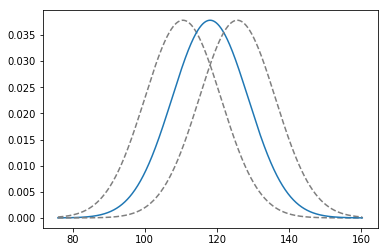

In [57]:
%matplotlib inline

import matplotlib.pyplot as plt
import scipy.stats as stats

mu = 118.1
sigma =10.5457
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, 110.5563, sigma), ls='--', c = 'tab:grey')
plt.plot(x, stats.norm.pdf(x, m, sigma), c = 'tab:blue')
plt.plot(x, stats.norm.pdf(x, 125.6437, sigma), ls='--', c = 'tab:grey')



3.**Известно, что рост футболистов в сборной распределен нормально с дисперсией генеральной совокупности, равной 25 кв.см. Объем выборки равен 27, среднее выборочное составляет 174.2. Найдите доверительный интервал для математического ожидания с надежностью 0.95.**

Т.к. нормальное распределение устойчиво по суммированию, то если наблюдение $X_i$ имеет нормальное распределение, то велечина 

$\eta = \sqrt{n}\frac{M-a}{\sigma}\ (1) $ имеет стандартное нормальное распределение.
Тогда найдём такое c>0, что $P(-c < \eta < c) = 0.95\ (2)$

Используя свойства функции распределение стандартного нормального закона полуаем, что 
$$ P(-c < \eta < c) = 2\Phi_{0,1}(с) -1 => \Phi_{0,1}(с) = \frac{(0.95 + 1)}{2}=0.975$$
используя табличные значения получаем, что c = 1.96

Теперь подставим (1) в (2) и разрешим неравенство относительно a:
$$P(-1.96 < \eta < 1.96) = P(M-1.96  <  \sqrt{n}\frac{M-a}{\sigma} < 1.96) = P(M - 1.96\frac{\sigma}{\sqrt{n}} < a < M + 1.96\frac{\sigma}{\sqrt{n}})=P(172.314 < a < 176.086) = 0.95 $$
Таким образом мы получили, что доверительный интервал (172.314,176.086) c вероятностью 95% накрывает параметр математитческого ожидания a

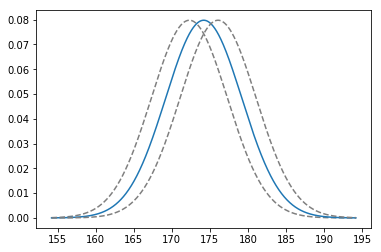

In [61]:
mu = 174.2
sigma =5
x = np.linspace(mu - 4*sigma, mu + 4*sigma, 1000)
plt.plot(x, stats.norm.pdf(x, 172.314, sigma), ls='--', c = 'tab:grey')
plt.plot(x, stats.norm.pdf(x, mu, sigma), c = 'tab:blue')
plt.plot(x, stats.norm.pdf(x, 176.086, sigma), ls='--', c = 'tab:grey')

4.**Выберите тему для проектной работы по курсу Теории вероятностей и математической статистики и напишите ее в комментарии к Практическому заданию.**

Т.к. занимаюсь криптовалютами, интересно было бы проект писать на эту тему. Не совсем понятно в чём именно должен быть проект, мы будем строить регрессии или просто оценивать какие-то распределения? В любом случае я бы выбрал статистическое сопоставление цены на биткоин с курсами фиатных активнов (USD,EUR,RUR), ценами на нефт, драг металлы или с ценами других криптовалют по отношению к биткоину.